<a href="https://colab.research.google.com/github/amikoshimrah/sothingshimrah/blob/main/Unsupervised_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning Project

## Data Description:

The data contains features extracted from the silhouette of vehicles in different
angles.
Four "Corgie" model vehicles were used for the experiment:
a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars.
This particular combination of vehicles was chosen with the expectation that the
bus, van and either one of the cars would be readily distinguishable, but it
would be more difficult to distinguish between the cars.

## Domain:

Object recognition

## Context:

The purpose is to classify a given silhouette as one of three types of vehicle,
using a set of features extracted from the silhouette. The vehicle may be viewed
from one of many different angles.

## Attribute Information:

-  All the features are geometric features extracted from the silhouette.
-  All are numeric in nature.

## Learning Outcomes:

- Exploratory Data Analysis
- Reduce number dimensions in the dataset with minimal information loss
- Train a model using Principle Components

## Objective:

Apply dimensionality reduction technique – PCA and train a model using
principle components instead of training the model using just the raw data.


### Import Libraries and check the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder # StandardScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist
from sklearn.svm import SVC
from sklearn import metrics
import warnings #to ignore any warnings
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage,cophenet
from scipy.spatial.distance import pdist
#from scipy.cluster.hierarchy import fcluster
from sklearn.decomposition import PCA
import copy
from sklearn import model_selection

In [ ]:
cl_df = pd.read_csv('vehicle.csv')
cl_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

## Exploratory Data Analysis

In [ ]:
# getting total number of rows and column in the dataframe
print(f'                 Shape of the dataframe : {cl_df.shape}')
print(f'    Total number of rows in the dataset : {cl_df.shape[0]}')
print(f' Total number of columns in the dataset : {cl_df.shape[1]}')

                 Shape of the dataframe : (846, 19)
    Total number of rows in the dataset : 846
 Total number of columns in the dataset : 19


In [ ]:
# Datatypes Information of the DataFrame
cl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

- All fields are numeric except class- no need to convert data types
- There are missing values in many columns like circularity, distance circularity, radius ratio .. etc
- class column is our target column.

In [ ]:
# Checking Null
print(f'Number of null for each columns:\n\n{cl_df.isnull().sum()}')
print('--------------------------------')
print(f'Count of Null:{cl_df.isnull().sum().sum()}')

Number of null for each columns:

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64
--------------------------------
Count of Null:41


- From above we can see that max null values is 6 which are in two columns 'radius_ratio', 'skewness_about'. so we have two options either we will drop those null values or we will impute those null values.We will impute in this assignment

###  Explore distribution of vehicle in each class

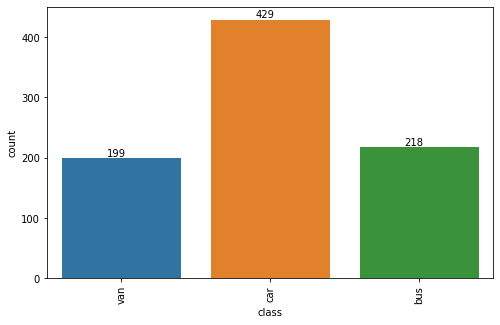

In [ ]:
#plot - checking the balance of dependent variable
plt.subplots(figsize=(8,5))
ax = sns.countplot(cl_df['class'])
plt.xticks(rotation=90)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+3))


- Cars are almost double in number as compared to bus and van. van is least in number

### Converting the dependent variable to category

In [ ]:
# label_encoder object knows how to understand word labels.
label_encoder = LabelEncoder()
cl_df['class']= label_encoder.fit_transform(cl_df['class']) # Encode labels in column 'class'.
cl_df['class'].unique() # getting the unique value from class

array([2, 1, 0])

### Filling the Missing Nan with Median and Recheck NANs and Duplicate Records

In [ ]:
# fill the nans with median using lambda function
#cl_df.dropna(axis=0,inplace=True)
cl_df = cl_df.apply(lambda x: x.fillna(x.median(),axis=0))

In [ ]:
#Re-checking the Nans and missing values
print(f'       The missing value of NaNs are : {cl_df.isna().sum().sum()}') #checking missing value NaN
print(f' The Number of duplicate records are : {cl_df.duplicated().sum()}') # Checcking if there is any duplicate record

       The missing value of NaNs are : 0
 The Number of duplicate records are : 0


In [ ]:
# getting total number of rows and column in the dataframe
cl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  846 non-null    float64
 2   distance_circularity         846 non-null    float64
 3   radius_ratio                 846 non-null    float64
 4   pr.axis_aspect_ratio         846 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                846 non-null    float64
 7   elongatedness                846 non-null    float64
 8   pr.axis_rectangularity       846 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              846 non-null    float64
 11  scaled_variance.1            846 non-null    float64
 12  scaled_radius_of_gyration    846 non-null    float64
 13  scaled_radius_of_gyr

- Now we can see all the variables doesn't contain any null values and all numericals

### Checking Summary Statistic

In [ ]:
# checking the statistic summary and transposed
cl_df.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   
class                        846.0    0.977541    0.702130    0.0    0.00   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0  
class                          1.0    1.00     2.0

__By analysing it, we can see that :__

- The are 3 distinct values in class dependent variable
- There are zeroes in skewness variables but i assume that this is valid data for this exercise
- No unsually data is visible and data looks good
- **Normal distribution:** compactness, circularity, distance_circularity, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about.2, hollows_ratio are approximately normally distributed.
- **skewed:** radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, scaled_variance, scaled_variance.1, skewness_about, skewness_about.1 are approx. right skewed distribution.

### Perform Uni-Variate and Bi-Variate Analysis

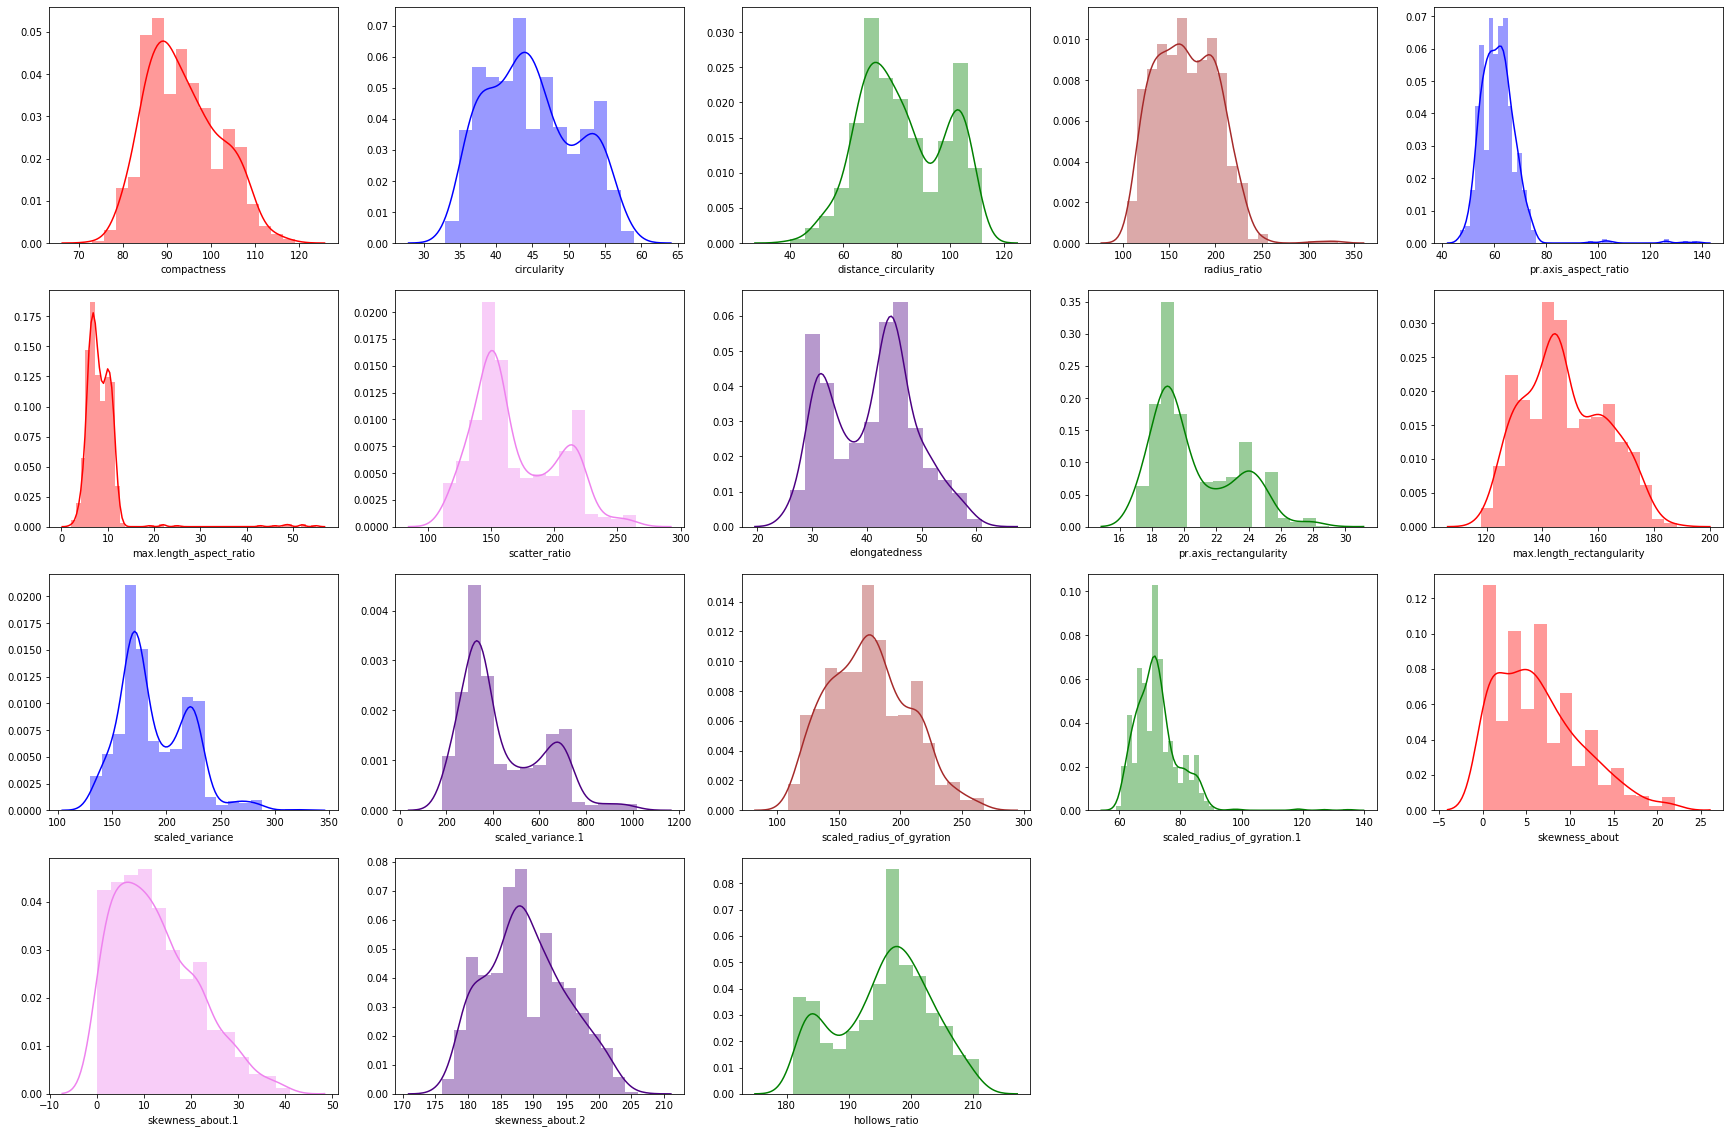

In [ ]:
plt.figure(figsize= (30,20))  # Set the figure size
colors = ['red', 'blue', 'green','brown','blue','red', 'violet', 'indigo','green','red', 'blue', 'indigo','brown','green','red', 'violet', 'indigo','green']      #Colors for visualization
pos = 1    # a variable to manage the position of the subplot in the overall plot
for feature,colors in zip(cl_df.columns,colors):   # for-loop to iterate over every attribute whose distribution is to be visualized
    plt.subplot(4, 5, pos)   # plot grid
    sns.distplot(cl_df[feature],color=colors,kde=True)  # Plot histogram for all the continuous columns
    pos += 1  # to plot over the grid one by one

- Data are continuously distributed except for pr.axis_rectangularity - we can cross-check with Histogram
- There are 3 columns where there are high skewness

In [ ]:
# Histogram - Exclude the dependent variable
cl_df.iloc[:,:-1].hist(figsize=(15,15));

- Data are continuously distributed and many variable are normally distributed.


### Check Skewness

In [ ]:
# Measure the skeweness of the numerics variables
pd_sk = pd.DataFrame( cl_df.skew().sort_values(ascending=False), columns= ['skewness'])
pd_sk[pd_sk['skewness']>1].T # lets filter only high skew greater than 1

max.length_aspect_ratio  pr.axis_aspect_ratio  \
skewness                 6.778394              3.835392   

          scaled_radius_of_gyration.1  
skewness                     2.089979

- the above 3 variable are highly skewed

### Check Outliers for whole dataset and for  dependent variable -each values

In [ ]:
# excluding the 'class' from boxplot
cols = [col for col in cl_df.columns if col not in ['class']]
plt.figure(figsize= (30,20))  # Set the figure size
pos = 1    # a variable to manage the position of the subplot in the overall plot
for feature in cols:   # for-loop to iterate over every attribute to be visualized
    plt.subplot(4, 5, pos)   # plot grid
    sns.boxplot(y=cl_df[feature],orient='vertical') # whole dataset
    pos += 1

- There are Outliers seen in many variables if we see the class wise even though there were only 3/4 variables seen outliers for overall.

### Handling the outlier

In [ ]:
#find the outliers and replace them by median
for col_name in cl_df.columns[:-1]:
    q1 = cl_df[col_name].quantile(0.25)
    q3 = cl_df[col_name].quantile(0.75)
    iqr = q3 - q1
    low = q1-1.5*iqr
    high = q3+1.5*iqr

    cl_df.loc[(cl_df[col_name] < low) | (cl_df[col_name] > high), col_name] = cl_df[col_name].median()

In [ ]:
# excluding the 'class' from boxplot - Rechecking Outliers
cols = [col for col in cl_df.columns if col not in ['class']]
plt.figure(figsize= (15,10))
pos = 1
for feature in cols:
    plt.subplot(3, 6, pos)
    sns.boxplot(y=cl_df[feature],orient='vertical')
    pos += 1

- __Now there is no outliers__

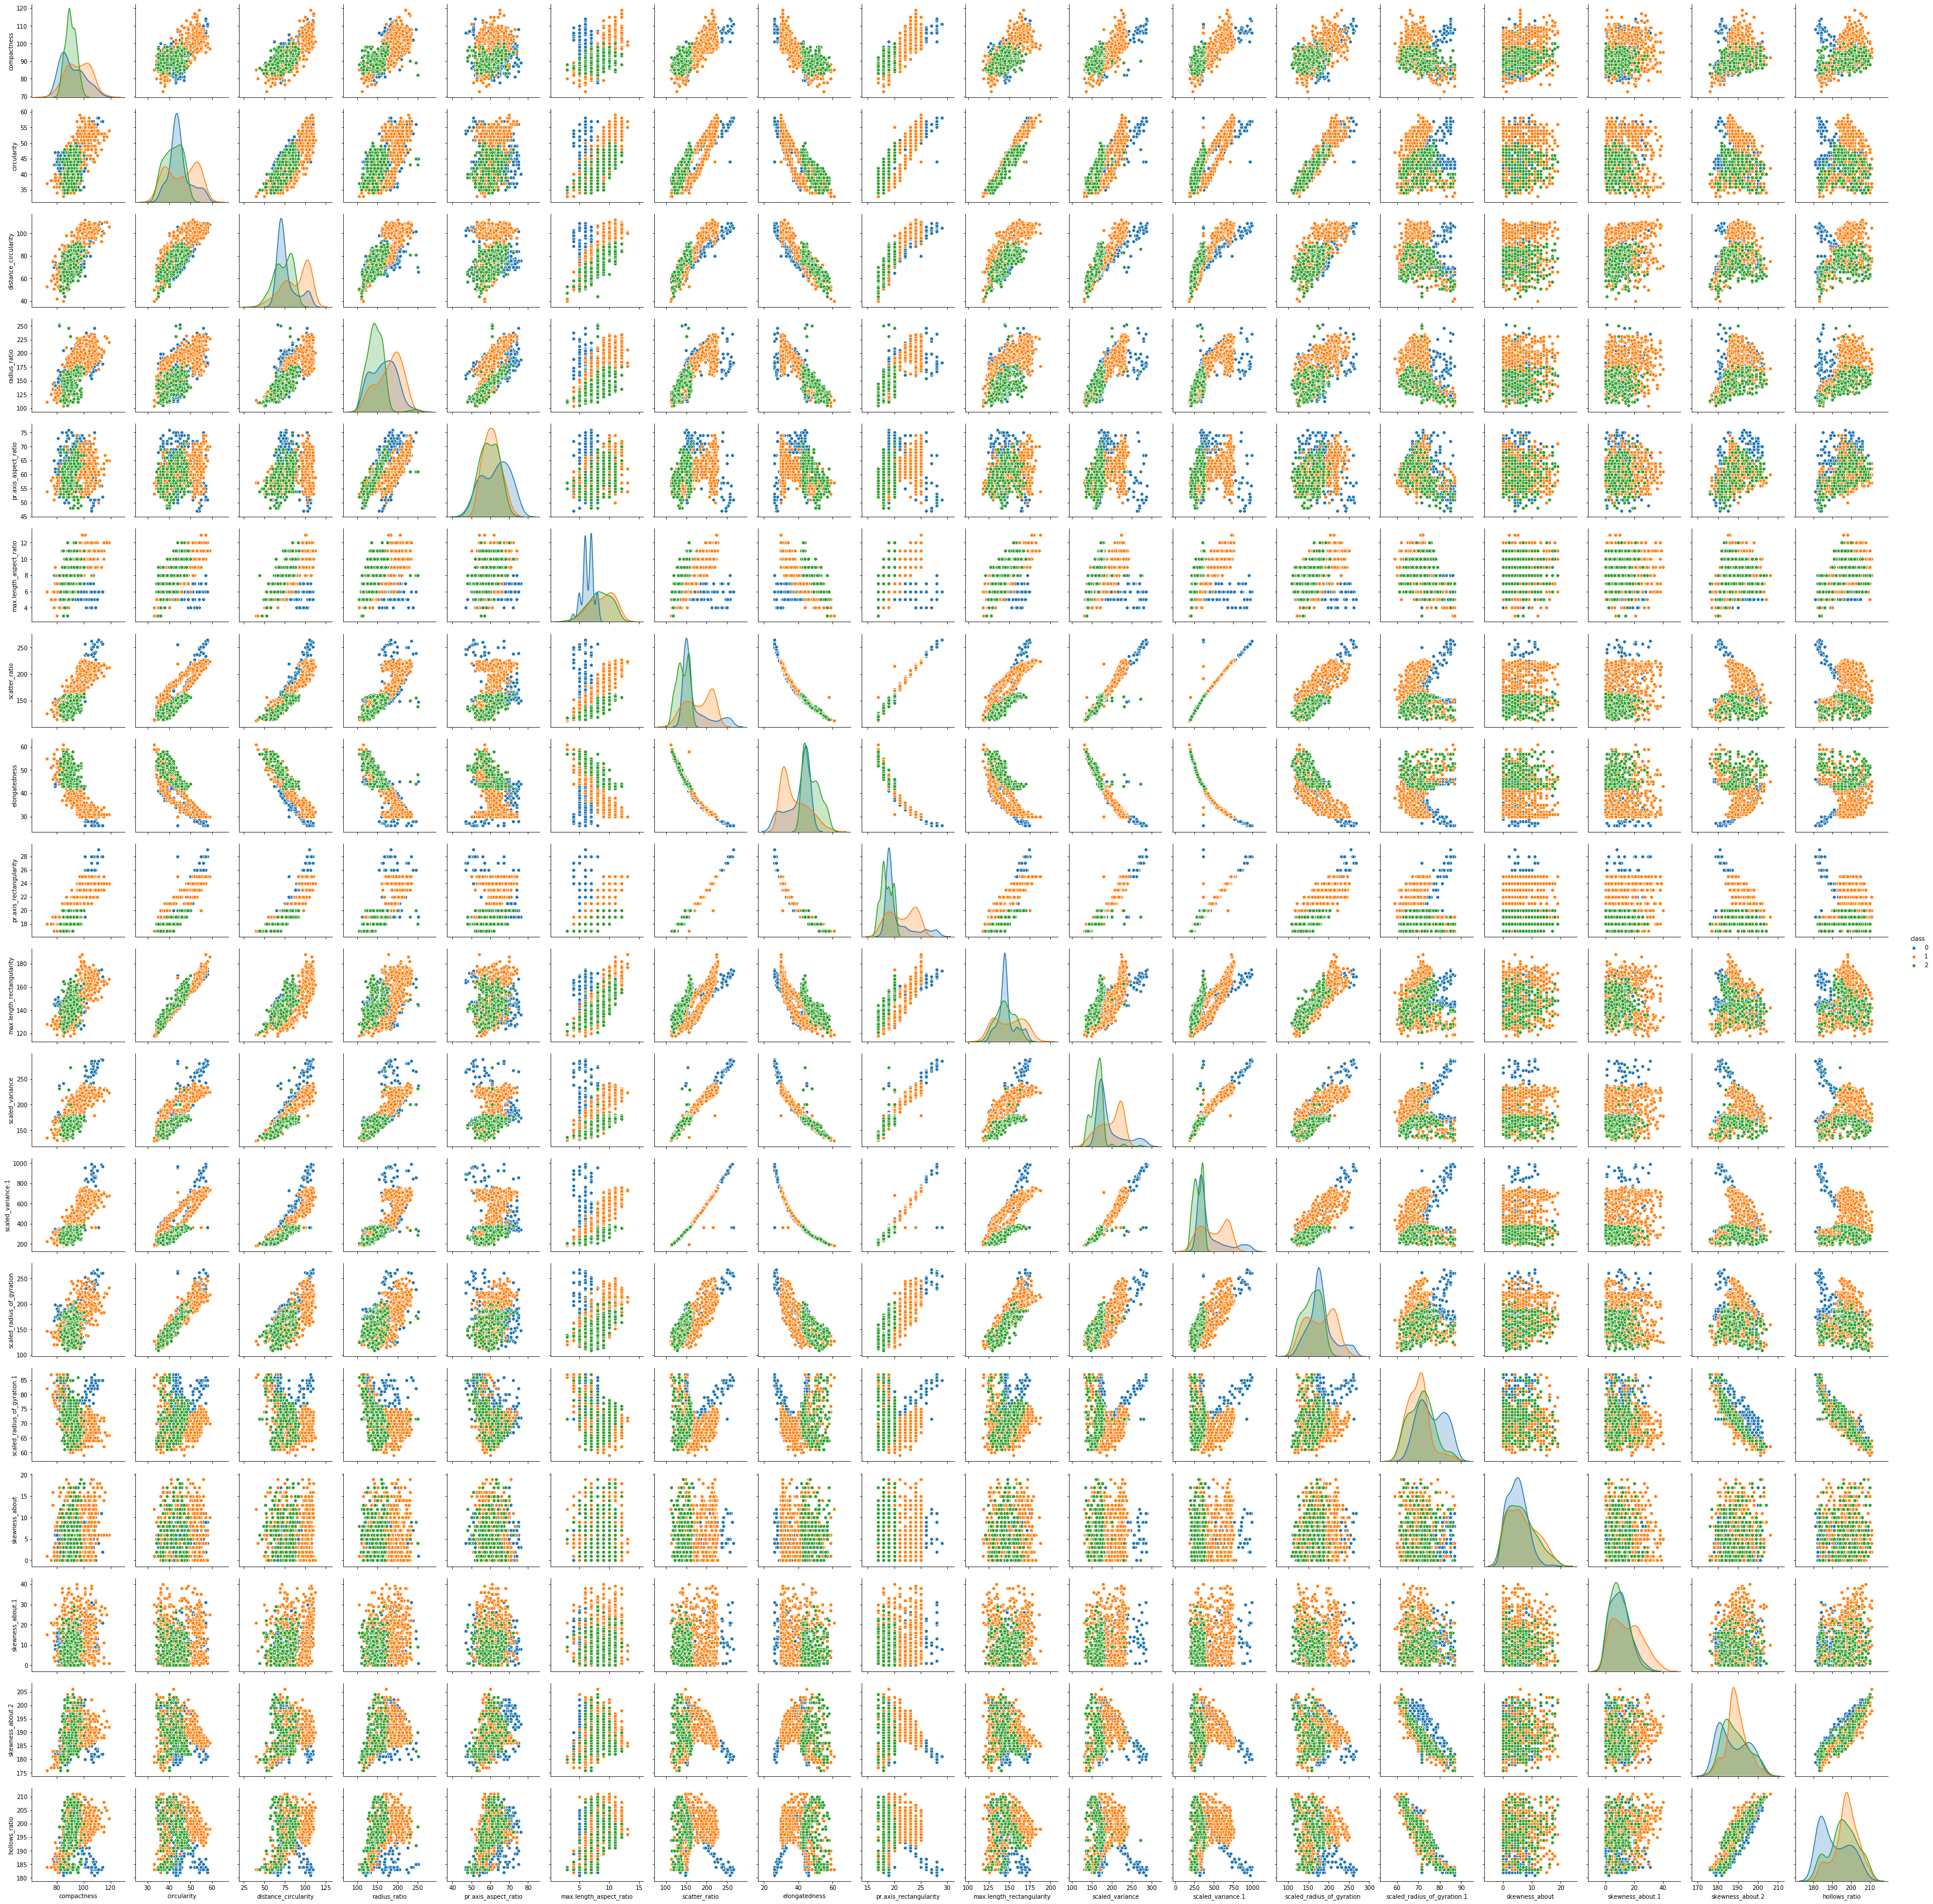

In [ ]:
# bivariate pairplot
sns.pairplot(cl_df,hue='class',diag_kind='kde')

__It is also showing the same information as correlation matrix.__
- from orthogonal matrix above there are indication that there might be more than __3 clusters__.some show even seven
- Visually, we can see that there are correlation between many variables either possitive or negative
- compactness has **positive linear relationship** with circularity, distance_circularity, radius_ratio, scatter_ratio, pr.axis_rectangularity, max.axis_rectangularity, scaled_variance1, scaled_variance.
- compactness has __negative linear relationship__ with elongatedness.
- circularity has **positive linear relationship** with distance_circularity, scatter_ratio, pr.axis_rectangularity, max.axis_rectangularity, scaled_variance, scaled_variance1, scaled_radius_of_gyration.
- circularity has __negative linear relationship__ with elongatedness.
- distance_circularity has **positive linear relationship** with radius_ratio, scatter_ratio, pr.axis_rectangularity, max.axis_rectangularity, scaled_variance, scaled_variance1, scaled_radius_of_gyration.
- distance_circularity has __negative linear relationship__ with elongatedness.
- radius_ratio has **positive linear relationship** with pr.axis_aspect_ratio, scatter_ratio, scaled_variance, scaled_variance1, scaled_radius_of_gyration.
- radius_ratio has **negative linear relationship** with elongatedness

### find the correlation between independent variables

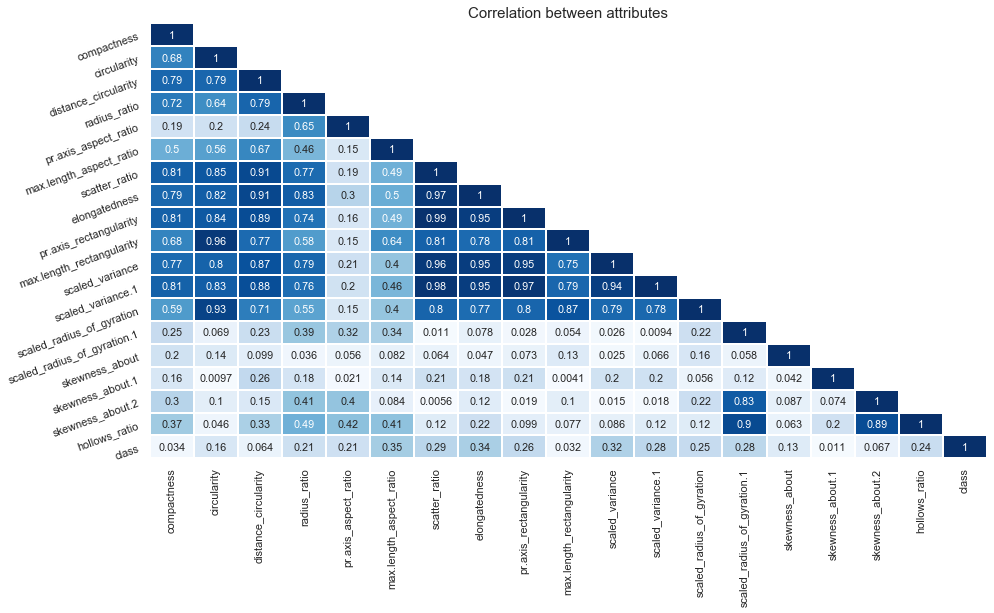

In [ ]:
# Correlation among the attributes
sns.set(font_scale=.90)
corr = abs(cl_df.corr()) # correlation matrix - taken absolute value as there is not impact on whether the correlation is negative or positive
lower_triangle = np.tril(corr, k = 0)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap
plt.figure(figsize = (15,8))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   # the Heatmap
plt.xticks(rotation = 90)   # Aesthetic purposes
plt.yticks(rotation = 20);   # Aesthetic purposes
plt.title('Correlation between attributes',fontsize=15)
plt.tick_params(labelsize=11)

__Inference from heat map:__

- From above correlation matrix we can see that there are many features which are highly correlated. if we see carefully then scaled_variance.1 and scatter_ratio has correlation of 1 and many other features are also there which having more than 0.9(positive or negative) correlation e.g sekweness_abou2 and hollows_ratio, scaled variance & scaled_variance1, elongatedness & scaled variance, elongatedness & scaled variance1 etc.

- There are lot of dimensions with correlation above +- 0.7 and it is difficult to determine which dimensions to drop manually.

- We will use PCA to determine it.

## Let's Train the Model in 3 scenarios:

**1) With Raw data without dropping any variables or Standardized. Note: It will more expensive in term of resource utilisation**

**2) Manually Drop the correlated variable and scaled the data**

**3) Using Principle Component Analysis**

**# Then compare their accuracy using Support Vector Model**

In [ ]:
# since we are working on Supervised and unsupervised activities let's copy the dataset
pca_df = copy.deepcopy(cl_df) # make copy for further use
cdf = copy.deepcopy(cl_df) # make copy for further use

### Let's proceed without applying Dimensionality Reduction or Standardised the Data

### Splitting the data into independent and dependent attributes

In [ ]:
XP = cdf.drop(['class'],axis=1) # using for scenario 1
y = cdf['class']
X = XP # using for scenario 2

In [ ]:
# split the data in 70:30 ratio
XP_train,XP_test,y_train,y_test = train_test_split(XP,y,test_size=0.3,random_state=42)

In [ ]:
#fit svm
rsvm = SVC(probability=True,random_state=42)
rsvm.fit(XP_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
XP_pred = rsvm.predict(XP_train) #Predict for train set
yp_pred = rsvm.predict(XP_test) #Predict for test set
tn, fp, fn, tp = metrics.confusion_matrix(y_test, yp_pred,labels=[0,1]).ravel()
rtrainscore = round(metrics.accuracy_score(y_train,XP_pred),3)
rtestscore = round(metrics.accuracy_score(y_test,yp_pred),3)
rprecision = round(tp/(tp+fp), 3)
rrecall = round(tp/(tp+fn), 3)
rf1_score = round(2*(rrecall * rprecision) / (rrecall + rprecision),3)
#Store the accuracy results for each kernel in a dataframe for final comparison
resultsDf=pd.DataFrame({'Model':['SVM'],'TrainAccuracy':rtrainscore,'TestAccuracy':rtestscore,
                        'Precision':rprecision,'Recall':rrecall,'f1_score':rf1_score, },index={'1'})
resultsDf=resultsDf[['Model','TrainAccuracy','TestAccuracy','Precision','Recall', 'f1_score']]
resultsDf

Model  TrainAccuracy  TestAccuracy  Precision  Recall  f1_score
1   SVM           0.65         0.654      0.746   0.969     0.843

- Not giving Good accuracy

### Hyper Parameter Tuning - Use GridSearch to find the best svm parameters

In [ ]:
# Use GridSearch to find the best svm parameters, and fit the training data to apply to test data.

rgssvm = model_selection.GridSearchCV(estimator= SVC(probability=True,random_state=42),
                     param_grid=[{'C':[2,3,4,5],
                                  'kernel':['linear', 'rbf', 'poly'],
                                  'degree':[2,3,5],
                                  'gamma':['auto']
                                 }],
                     scoring='accuracy',cv=10,n_jobs=4)
rgssvm_fit = rgssvm.fit(XP_train, y_train)
y_pred = rgssvm_fit.predict(XP_test)
rbestscore = round(rgssvm.best_score_,3)
rtrain_score = round(rgssvm.score(XP_train, y_train),3)
rtest_score = round(rgssvm.score(XP_test, y_test),3)
print('Model  BestScore TrainingScore TestScore')
print()
print(f'SVM:     {rbestscore}       {rtrain_score}        {rtest_score}')
print('\n******************************************\n')
## best parameter
print('Best parameter :\n',rgssvm.best_params_)
## best estimator
print('\nSVM parameters: \n', rgssvm_fit.best_estimator_)

Model  BestScore TrainingScore TestScore

SVM:     0.943       0.978        0.929

******************************************

Best parameter :
 {'C': 2, 'degree': 2, 'gamma': 'auto', 'kernel': 'linear'}

SVM parameters: 
 SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto', kernel='linear',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)


In [ ]:
#k - fold Cross Validation score for support vector model
num_folds = 10
kfold = model_selection.KFold(n_splits=num_folds)
rsvm_scores=model_selection.cross_val_score(rsvm , XP_train, y_train, scoring='accuracy', cv=kfold)
print('k-fold Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(rsvm_scores), np.std(rsvm_scores)))

k-fold Cross Validation accuracy: 0.625 +/- 0.062


In [ ]:
#Store the accuracy results for each kernel in a dataframe for final comparison
rresultsDf=pd.DataFrame({'Model':['Raw_SVM'],'TrainAccuracy':rtrainscore,'TestAccuracy':rtestscore,
                        'Precision':rprecision,'Recall':rrecall,'f1_score':rf1_score,
                        'CVmean':round(np.mean(rsvm_scores),3),'CVStd': round(np.std(rsvm_scores),3),
                        'bestscore':rbestscore },index={'1'})
rresultsDf=rresultsDf[['Model','TrainAccuracy','TestAccuracy','Precision','Recall', 'f1_score','CVmean','CVStd','bestscore']]
rresultsDf

Model  TrainAccuracy  TestAccuracy  Precision  Recall  f1_score  CVmean  \
1  Raw_SVM           0.65         0.654      0.746   0.969     0.843   0.625   

   CVStd  bestscore  
1  0.062      0.943

## Let's Standardize the data and remove the correlated variables

In [ ]:
# Drop these 8 columns which are corelated
X.drop(['scatter_ratio','elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1','scaled_radius_of_gyration','hollows_ratio'],axis=1,inplace=True)

In [ ]:
# prior to scaling
plt.rcParams['figure.figsize']=(10,5)
plt.plot(XP);


In [ ]:
# Since the dimensions of the data are not really known to us, let's standardize the data using z scores
X = X.apply(zscore)

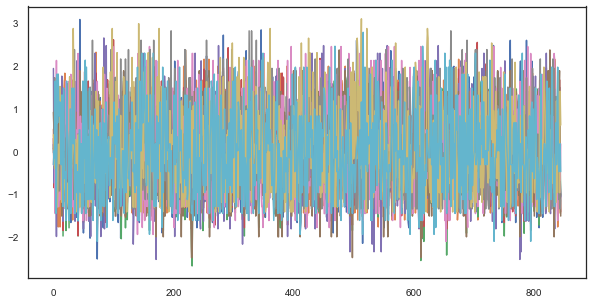

In [ ]:
# post to scaling
plt.rcParams['figure.figsize']=(10,5)
plt.plot(X);

- We can see that scaling has brought down axis and also it has brought every attrubutes on same scale.

##  Training and Model Building
   __Will Split the data into training and test set in the ratio of 70:30 respectively__

In [ ]:
# split the data in 70:30 ratio
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

### Training Standard Classification Algorithms using support vector model

In [ ]:
#fit svm
ssvm = SVC(probability=True,random_state=42)
ssvm.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
X_pred = ssvm.predict(X_train) #Predict for train set
y_pred = ssvm.predict(X_test) #Predict for test set
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred,labels=[0,1]).ravel()
strainscore = round(metrics.accuracy_score(y_train,X_pred),3)
stestscore = round(metrics.accuracy_score(y_test,y_pred),3)
sprecision = round(tp/(tp+fp), 3)
srecall = round(tp/(tp+fn), 3)
sf1_score = round(2*(srecall * sprecision) / (srecall + sprecision),3)
#Store the accuracy results for each kernel in a dataframe for final comparison
s_resultsDf=pd.DataFrame({'Model':['SVM'],'TrainAccuracy':strainscore,'TestAccuracy':stestscore,
                        'Precision':sprecision,'Recall':srecall,'f1_score':sf1_score, },index={'1'})
s_resultsDf=resultsDf[['Model','TrainAccuracy','TestAccuracy','Precision','Recall', 'f1_score']]
s_resultsDf

Model  TrainAccuracy  TestAccuracy  Precision  Recall  f1_score
1   SVM           0.65         0.654      0.746   0.969     0.843

### Hyper Parameter Tuning - Use GridSearch to find the best svm parameters

In [ ]:
# Use GridSearch to find the best svm parameters, and fit the training data to apply to test data.

sgssvm = model_selection.GridSearchCV(estimator= SVC(probability=True,random_state=42),
                     param_grid=[{'C':[2,3,4,5],
                                  'kernel':['linear', 'rbf', 'poly'],
                                  'degree':[2,3,5],
                                  'gamma':['auto']
                                 }],
                     scoring='accuracy',cv=10,n_jobs=4)
sgssvm_fit = sgssvm.fit(X_train, y_train)
y_pred = sgssvm_fit.predict(X_test)
sbestscore = round(sgssvm.best_score_,3)
strain_score = round(sgssvm.score(X_train, y_train),3)
stest_score = round(sgssvm.score(X_test, y_test),3)
print('Model  BestScore TrainingScore TestScore')
print()
print(f'SVM:     {sbestscore}       {strain_score}        {stest_score}')
print('\n******************************************\n')
## best parameter
print('Best parameter :\n',sgssvm.best_params_)
## best estimator
print('\nSVM parameters: \n', sgssvm_fit.best_estimator_)

Model  BestScore TrainingScore TestScore

SVM:     0.927       0.971        0.941

******************************************

Best parameter :
 {'C': 4, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}

SVM parameters: 
 SVC(C=4, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)


### k-fold Cross-Validation

In [ ]:
#k - fold Cross Validation score for support vector model
num_folds = 10
kfold = model_selection.KFold(n_splits=num_folds)
ssvm_scores=model_selection.cross_val_score(ssvm , X_train, y_train, scoring='accuracy', cv=kfold)
print('k-fold Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(ssvm_scores), np.std(ssvm_scores)))

k-fold Cross Validation accuracy: 0.914 +/- 0.040


In [ ]:
#Store the accuracy results for each kernel in a dataframe for final comparison
sresultsDf=pd.DataFrame({'Model':['Scaled_SVM'],'TrainAccuracy':strainscore,'TestAccuracy':stestscore,
                        'Precision':sprecision,'Recall':srecall,'f1_score':sf1_score,'CVmean':round(np.mean(ssvm_scores),3),
                        'CVStd': round(np.std(ssvm_scores),3),'bestscore':sbestscore },index={'2'})
sresultsDf=sresultsDf[['Model','TrainAccuracy','TestAccuracy','Precision','Recall', 'f1_score','CVmean','CVStd','bestscore']]
sresultsDf

Model  TrainAccuracy  TestAccuracy  Precision  Recall  f1_score  \
2  Scaled_SVM          0.953         0.945      0.983     1.0     0.991   

   CVmean  CVStd  bestscore  
2   0.914   0.04      0.927

### The model performance turn out to be very good.

### Find optimal number of cluster using KMeans

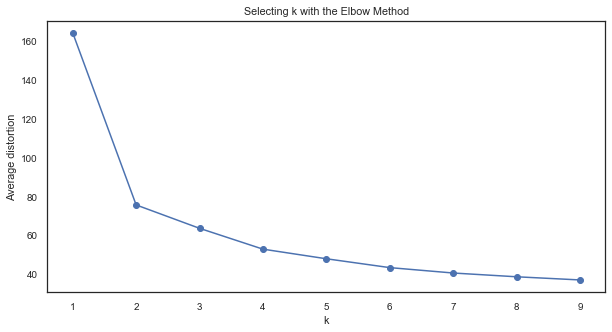

In [ ]:
#Finding optimal no. of clusters
clusters=range(1,10)
meanDistortions=[]
for k in clusters:
    model=KMeans(n_clusters=k,random_state=42)
    model.fit(pca_df)
    prediction=model.predict(pca_df)
    meanDistortions.append(sum(np.min(cdist(pca_df, model.cluster_centers_, 'euclidean'), axis=1)) / pca_df.shape[0])
plt.plot(clusters, meanDistortions, 'bo-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method');

### Standardize the dataset using Zscore

In [ ]:
# let's remove class from the dataset
pca_s = pca_df.iloc[:,:-1]

In [ ]:
pca_s = pca_s.apply(zscore) # Applying Zscore to the dataset
pca_sc = copy.deepcopy(pca_s) #for further use KMeans
pca_ac = copy.deepcopy(pca_s) #for further use AgglomerativeClustering
pca_cp = copy.deepcopy(pca_s) #for further use PCA

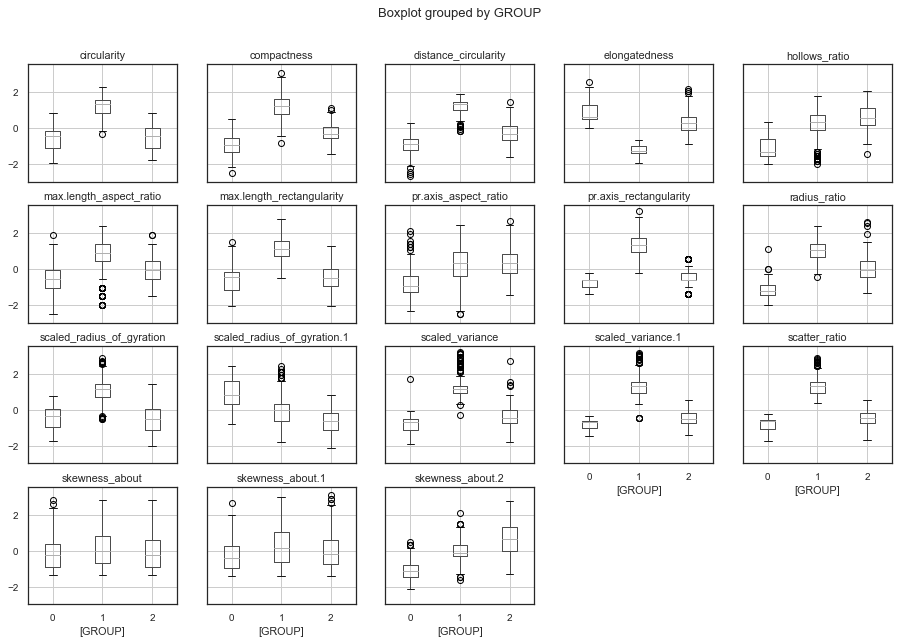

In [ ]:
# Let us first start with K = 3
final_model=KMeans(n_clusters=3, n_init = 15, random_state=42)
final_model.fit(pca_sc)
prediction=final_model.predict(pca_sc)
#Append the prediction
pca_sc["GROUP"] = prediction
pca_sc.boxplot(by='GROUP', layout = (4,5),figsize=(15,10));

In [ ]:
# Let us check with K = 4
final_model=KMeans(n_clusters=4, n_init = 15, random_state=42)
final_model.fit(pca_sc)
prediction=final_model.predict(pca_sc)
#Append the prediction
pca_sc["GROUP"] = prediction
pca_sc.boxplot(by='GROUP', layout = (4,5),figsize=(15,10));

__From the above boxplot:__ For cluster - 4 [GROUP] 0 and 4 are very close each other.Will be difficult to identify
  

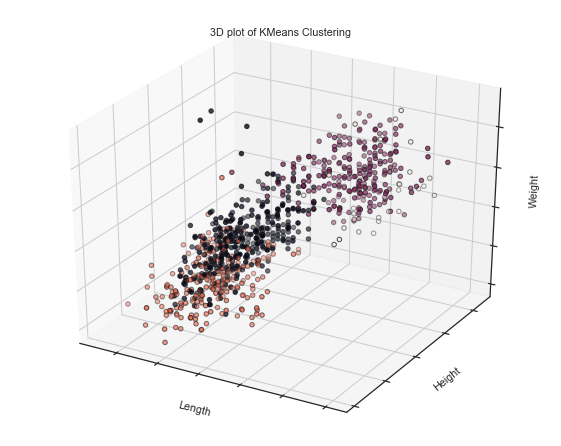

In [ ]:
## 3D plots of clusters
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1])#, elev=20, azim=70)
kmeans=KMeans(n_clusters=4,n_init = 15,  random_state=42)
kmeans.fit(pca_sc)
labels = kmeans.labels_
ax.scatter(pca_sc.iloc[:, 0], pca_sc.iloc[:, 1], pca_sc.iloc[:, 3],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering');

- It is not clearly visible all the differences from the scatter plot.

### Cluster evaluation for 3,4,5 clusters: the silhouette score

In [ ]:
# take the number of cluster as 3,4,5
n = [3,4,5]
pos = 1
for n in n:
    k_means = KMeans(n_clusters = n,random_state=42)
    k_means.fit(pca_sc)
    labels = k_means.labels_
    print(f'silhouette_score {n} : {round(silhouette_score(pca_sc,labels),3)}')
    pos+=1

silhouette_score 3 : 0.321
silhouette_score 4 : 0.314
silhouette_score 5 : 0.26


- KMeans suggested 3 as the silhouette_score is highest at 0.321 but not much difference from 4 (.314)
- However lets explore Agglomerative Dendogram as well

### Cophenet Index and Agglomerative Dendogram

### check method

Cophenet Index for ward: 0.6812108493859742
Cophenet Index for complete: 0.6085847436421525
Cophenet Index for average: 0.6993930382444242


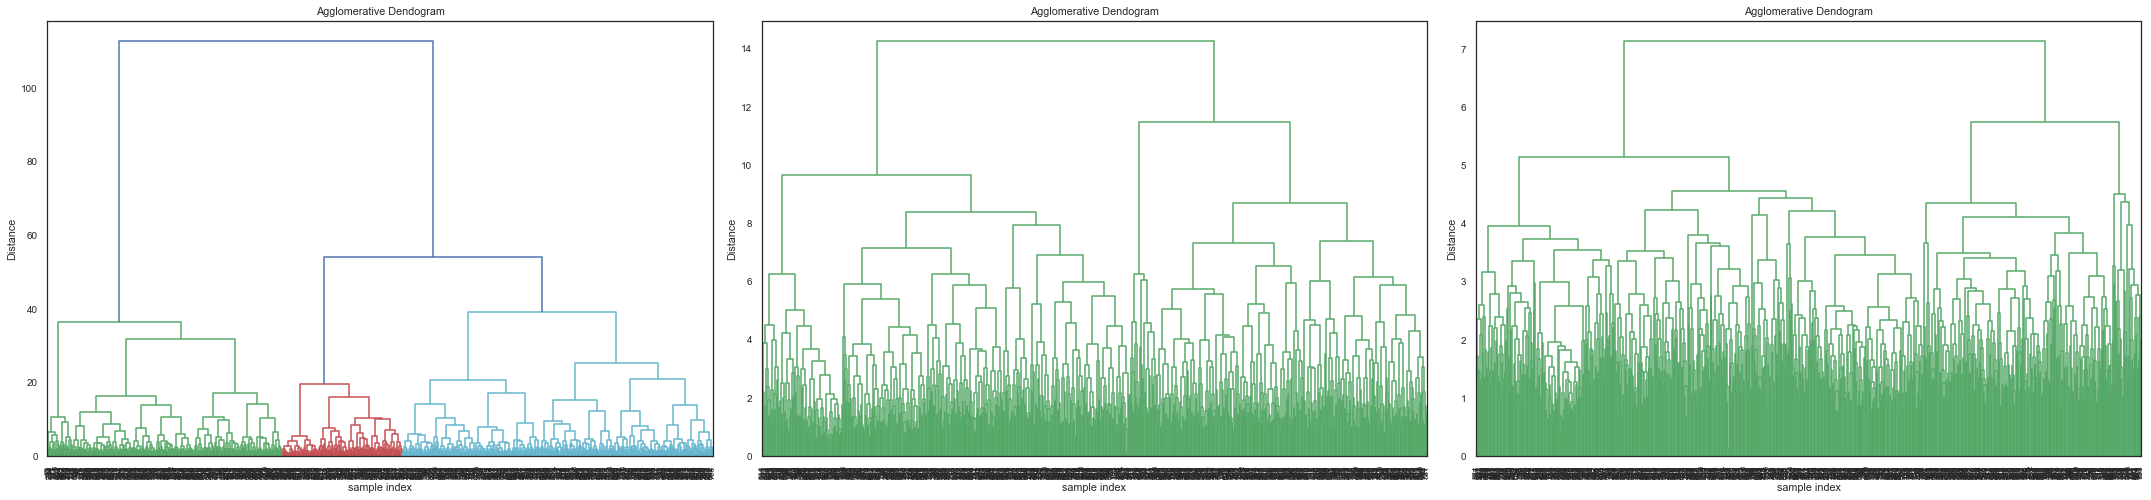

In [ ]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering
plt.figure(figsize= (30,20))  # Set the figure size
methods = ['ward', 'complete', 'average']      #methods for visualization

pos = 1    # a variable to manage the position of the subplot in the overall plot
for m in methods:
    Z = linkage(pca_ac, metric='euclidean', method=m)
    c, coph_dists = cophenet(Z , pdist(pca_ac))
    print(f'Cophenet Index for {m}: {c}')
    plt.subplot(3,3, pos)
    plt.title('Agglomerative Dendogram')
    plt.xlabel('sample index')
    plt.ylabel('Distance')
    dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
    plt.tight_layout()
    pos += 1


- Cophenet index suggest that __average__ will be the best link however let explore the distribution

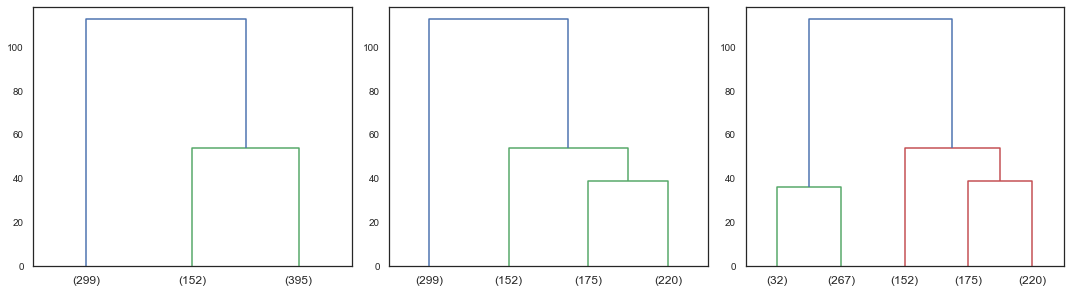

In [ ]:
# Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
plt.figure(figsize= (15,12))
n = [3,4,5] # number of cluster
pos = 1
for n in n:
    #plt.figure(figsize=(15,12))
    plt.subplot(3,3,pos)
    dendrogram(Z = linkage(pca_ac, metric='euclidean', method= 'ward'),truncate_mode='lastp',p=n )
    plt.tight_layout()
    pos+=1

- from the above dendrogram, ward has better distribution
- The distribution within dandrogram at the distance ~40
- Note: Check Manually for 'complete' and 'average'

### Check Optimum Clusters - Agglomeration Clustering

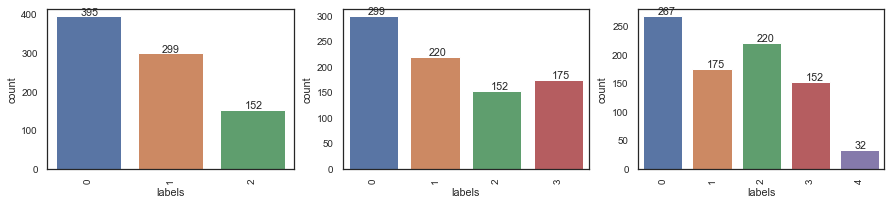

In [ ]:
# using multiple cluster let check the different linkage
plt.figure(figsize= (15,10))
n =[3,4,5]
pos = 1
for n in n:
    model = AgglomerativeClustering(n_clusters=n, affinity='euclidean',  linkage= 'ward')
    model.fit(pca_ac)
    pca_ac['labels'] = model.labels_
    plt.subplot(3,3, pos)
    ax = sns.countplot(pca_ac['labels'])
    plt.xticks(rotation=90)
    for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+3))
    pos+= 1

__From the above, 3 or 4 clusters has better distribution compare to 5 cluster__

### Create a covariance matrix for identifying principal components

In [ ]:
# PCA - Step 1 - Create covariance matrix
cov_matrix = np.cov(pca_cp.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00118343  0.68569786  0.79086299  0.72277977  0.1930925   0.50051942
   0.81358214 -0.78968322  0.81465658  0.67694334  0.77078163  0.80712401
   0.58593517 -0.24697246  0.19754181  0.1565327   0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.63903532  0.20349327  0.5611334
   0.8489411  -0.82244387  0.84439802  0.96245572  0.80371846  0.82844154
   0.92691166  0.06882659  0.13651201 -0.00967793 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.79516215  0.24462154  0.66759792
   0.90614687 -0.9123854   0.89408198  0.77544391  0.87061349  0.88498924
   0.70660663 -0.22962442  0.09922417  0.26265581  0.14627113  0.33312625]
 [ 0.72277977  0.63903532  0.79516215  1.00118343  0.65132393  0.46450748
   0.77085211 -0.82636872  0.74502008  0.58015378  0.78711387  0.76115704
   0.55142559 -0.39092105  0.03579728  0.17981316  0.40632957  0.49234013]
 [ 0.1930925   0.20349327  0.24462154  0.65132393  1.00118343  0.15047265
   0.19442484

### Identify eigen values and eigen vector

In [ ]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-2.72502890e-01 -8.70435783e-02  3.81852075e-02  1.38675013e-01
  -1.37101466e-01  2.63611383e-01  2.02717114e-01 -7.58796410e-01
   3.66685918e-01  1.60045219e-01  8.40252779e-02  2.14645175e-02
  -1.87350749e-02  6.89082276e-02  4.26105276e-02  9.97784975e-02
  -8.22590084e-02 -3.30366937e-02]
 [-2.87254690e-01  1.31621757e-01  2.01146908e-01 -3.80554832e-02
   1.38995553e-01 -7.13474241e-02 -3.92275358e-01 -6.76034223e-02
   5.53261885e-02 -1.82323962e-01 -3.65229874e-02  1.47247511e-01
  -4.89102355e-02  5.90534770e-02 -6.74107885e-01  1.63466948e-01
  -2.59100771e-01  2.48832011e-01]
 [-3.02421105e-01 -4.61430061e-02 -6.34621085e-02  1.08954287e-01
   8.00174278e-02 -1.69006151e-02  1.63371282e-01  2.77371950e-01
   7.46784853e-02  2.73033778e-01  4.68505530e-01  6.52730855e-01
   4.74162132e-03 -1.62108150e-01 -4.99754439e-04 -6.36582307e-02
   1.20629778e-01  9.80561531e-02]
 [-2.69713545e-01 -1.97931263e-01 -5.62851689e-02 -2.54355087e-01
  -1.33744367e-01 -

### Find variance and cumulative variance by each eigen vector

In [ ]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 54.0993254   72.69242795  79.30893968  85.60048941  90.50578051
  94.2028816   95.96829741  97.23446089  97.96148159  98.40463444
  98.81191882  99.17047375  99.39323715  99.57233547  99.73544045
  99.86140541  99.97135127 100.        ]


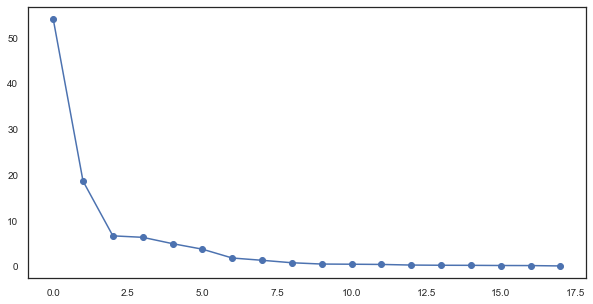

In [ ]:
plt.plot(var_exp,'bo-')

## Try to capture about 95% of the variance in the data

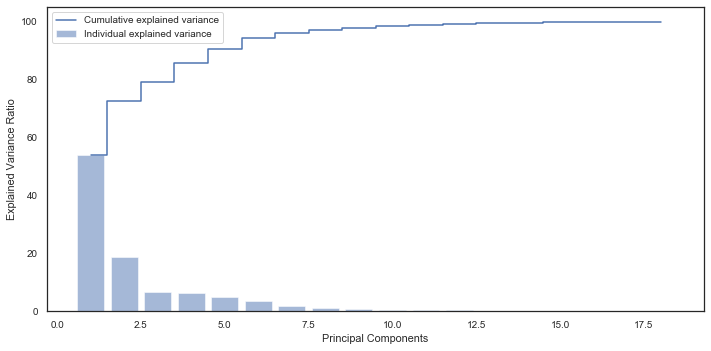

In [ ]:
# Visually we can observe that their is steep drop in variance explained with increase in number of PC's.
# We will proceed with 6 components here. But depending on requirement 90% variation will be good
# Ploting
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()

- Principal Component 1 covers around 55%
- Principal Component 2 covers around 15%
- Principal Component upto 7 cover around 96% (Cumulative)
- __Note:__ taking upto 7 as per the assignment requirment otherwise till 5 covers 90% information

###  Dimensionality Reduction - Principal Components Analysis (PCA).

In [ ]:
pcav = PCA(n_components=7,random_state=42) # this will cover around 96% of information
data_reduced = pcav.fit_transform(pca_cp)
data_reduced.transpose()

array([[ 0.58422804, -1.5121798 ,  3.91344816, ...,  5.12009307,
        -3.29709502, -4.96759448],
       [-0.67567325, -0.34893367,  0.2345073 , ..., -0.18227007,
        -1.10194286,  0.42274968],
       [-0.45333356, -0.33343619, -1.26509352, ..., -0.50836783,
         1.93384417,  1.30871531],
       ...,
       [-0.77751466, -0.32492864,  0.91575098, ..., -1.32038003,
        -0.5020676 , -0.17468618],
       [-1.84880885, -0.11831711, -0.68559401, ...,  0.17264281,
         0.02003876,  0.38469257],
       [-0.18041486,  0.20330786,  0.8115882 , ...,  0.88474898,
        -0.26057896, -0.39384301]])

- NOTE - we are generating only 7 PCA dimensions (dimensionality reduction from 18 to 7)

## Check 7 PCA dimensions will cover what percentage of the overall information

In [ ]:
print(f'Variance Ratio for 7 PCAs :{pcav.explained_variance_ratio_}')
print(f'     Total Variance Ratio :{sum(pcav.explained_variance_ratio_)}')

Variance Ratio for 7 PCAs :[0.54099325 0.18593103 0.06616512 0.0629155  0.04905291 0.03697101
 0.01765416]
     Total Variance Ratio :0.959682974076251


### Find correlation between components and features

In [ ]:
df_comp = pd.DataFrame(data = data_reduced,columns=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7'])
df_comp.head()

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7
0  0.584228 -0.675673 -0.453334 -0.750656 -0.777515 -1.848809 -0.180415
1 -1.512180 -0.348934 -0.333436  1.268953 -0.324929 -0.118317  0.203308
2  3.913448  0.234507 -1.265094  0.137224  0.915751 -0.685594  0.811588
3 -1.535193 -3.044413 -0.469623  0.324317 -0.611590  0.367777  0.118281
4 -0.642062  1.488882 -0.246288 -0.550939  0.471655 -1.012698  0.468846

### get labels append to dataframe

In [ ]:
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean',  linkage= 'ward')
model.fit(df_comp)
df_comp['labels'] = model.labels_
df_comp

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0    0.584228 -0.675673 -0.453334 -0.750656 -0.777515 -1.848809 -0.180415   
1   -1.512180 -0.348934 -0.333436  1.268953 -0.324929 -0.118317  0.203308   
2    3.913448  0.234507 -1.265094  0.137224  0.915751 -0.685594  0.811588   
3   -1.535193 -3.044413 -0.469623  0.324317 -0.611590  0.367777  0.118281   
4   -0.642062  1.488882 -0.246288 -0.550939  0.471655 -1.012698  0.468846   
..        ...       ...       ...       ...       ...       ...       ...   
841 -0.386970 -0.637161  1.463974  0.288644  0.811656 -0.909567  0.869369   
842 -0.038387 -0.193918  0.567673 -0.246129 -1.922733 -1.448913 -0.296310   
843  5.120093 -0.182270 -0.508368 -0.993095 -1.320380  0.172643  0.884749   
844 -3.297095 -1.101943  1.933844  0.441126 -0.502068  0.020039 -0.260579   
845 -4.967594  0.422750  1.308715  0.291942 -0.174686  0.384693 -0.393843   

     labels  
0         2  
1         0  
2         1  
3         3  
4         0  
..      ...  
841       2  
842       0  
843       1  
844       3  
845       0  

[846 rows x 8 columns]

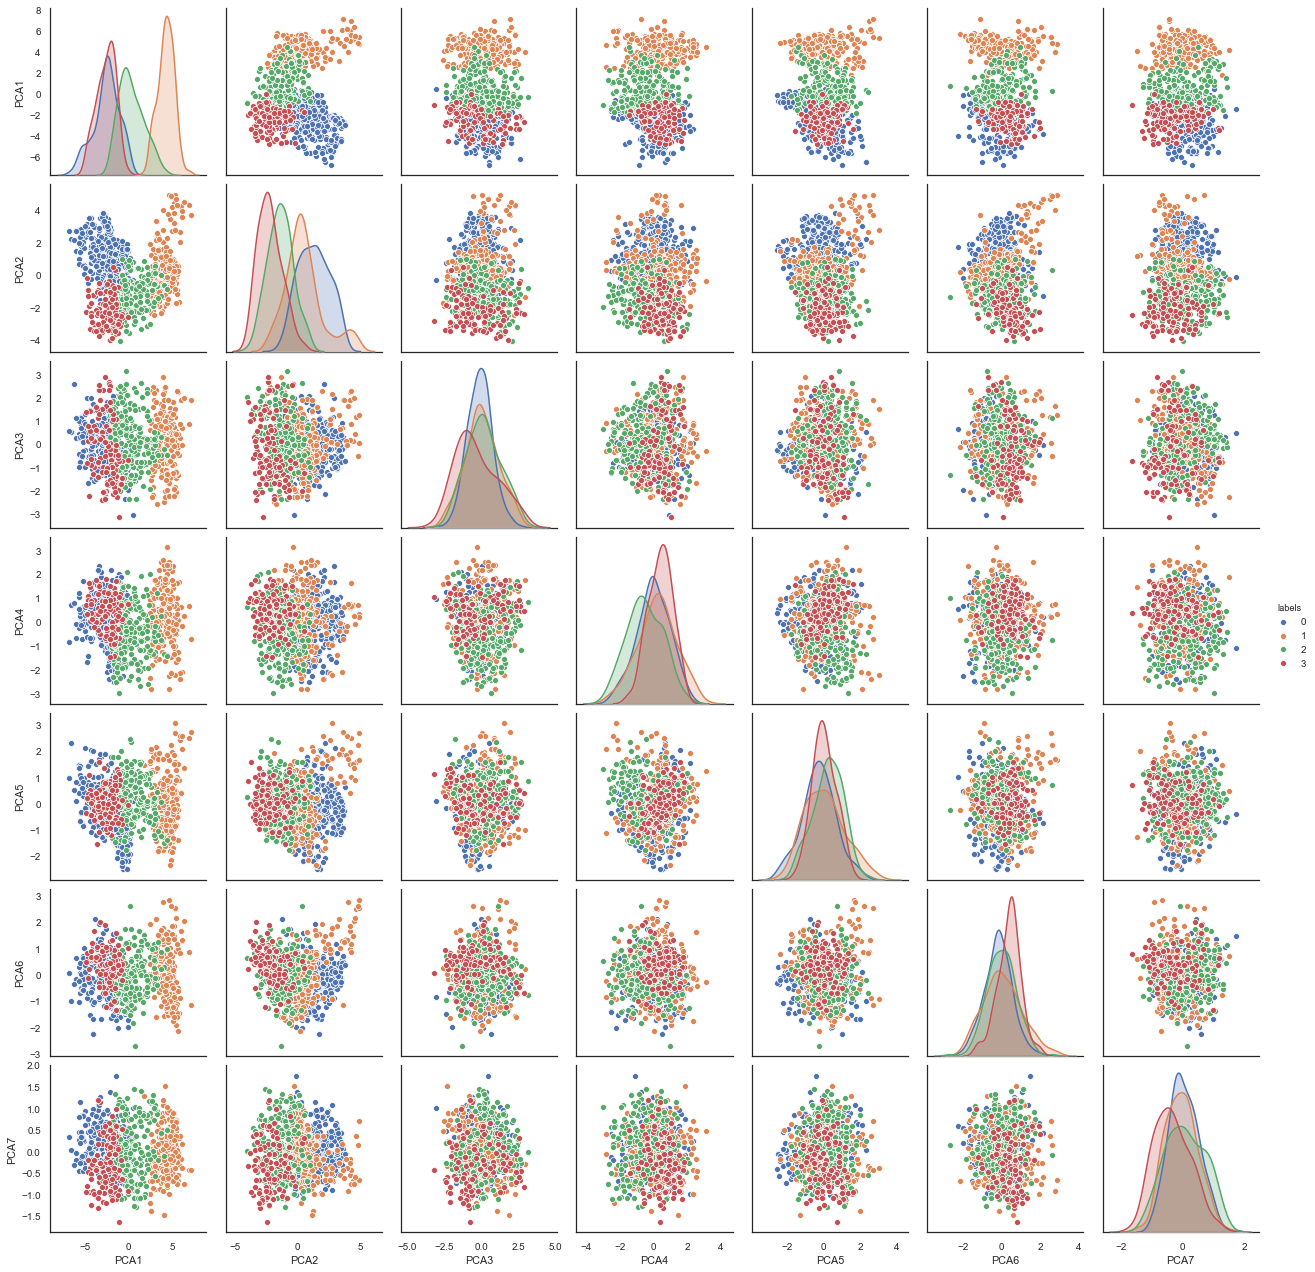

In [ ]:
#plot pairplot to see the correlations between the [ca variables
sns.pairplot(df_comp,diag_kind='kde',hue='labels')

- In the first variable, the 4 distinct cluster can be visible. Yellow and green are clearly visible even though the blue and red are very close

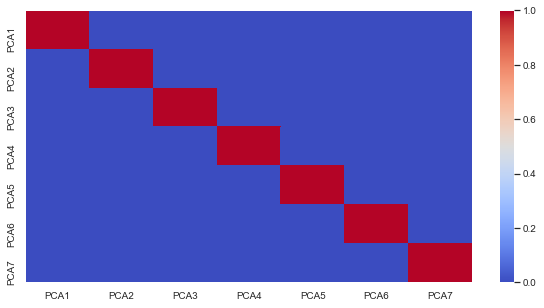

In [ ]:
#Plot heatmap to check the relation between variables
df=df_comp.iloc[:,:-1]# exclude the labels from ploting heatmap
sns.heatmap(df.corr(),cmap='coolwarm')

- There is no correlation between variables

### Append the new 4 clusters to the original data and take the mean labels wise

In [ ]:
cdf['labels']=df_comp['labels']
clust_profile=cdf.drop(['class'],axis=1)
clust_profile['labels']= df_comp['labels']
clust_profile=clust_profile.groupby('labels').mean()
clust_profile['freq']=cdf['labels'].value_counts().sort_index()
clust_profile.T

labels                                0           1           2           3
compactness                   86.729904  103.950226   94.923077   90.207547
circularity                   41.755627   52.877828   43.745192   39.150943
distance_circularity          70.115756  102.185520   84.634615   70.415094
radius_ratio                 138.016077  200.705882  187.317308  152.518868
pr.axis_aspect_ratio          58.305466   61.904977   65.028846   60.349057
max.length_aspect_ratio        7.302251    9.687783    8.024038    7.424528
scatter_ratio                144.810289  215.814480  170.759615  138.018868
elongatedness                 46.974277   30.927602   38.783654   48.311321
pr.axis_rectangularity        18.758842   24.280543   20.572115   18.226415
max.length_rectangularity    141.299035  166.321267  144.600962  136.122642
scaled_variance              166.138264  229.018100  193.346154  159.566038
scaled_variance.1            309.903537  684.900452  443.336538  286.924528
scaled_radius_of_gyration    161.903537  214.352941  167.947115  142.877358
scaled_radius_of_gyration.1   76.495177   72.255656   68.401442   64.891509
skewness_about                 5.543408    7.190045    5.543269    6.933962
skewness_about.1              10.041801   15.705882   13.144231   12.283019
skewness_about.2             183.594855  188.307692  193.658654  196.509434
hollows_ratio                189.090032  196.552036  200.389423  203.575472
freq                         311.000000  221.000000  208.000000  106.000000

#### Inference:
- __looking at compactness,distance_circularity,scatter_ratio pr.axis_rectangular,scaled_variance the labels 1 is the biggest vehicle followed by 2 and 0 & 3 seems to be smaller__
- __the labels 0 & 3 seems to be more or less the same in most of the variables__
-__labels 1 and 2 can be easily distinguish but either 0 or 3. Labels 0 and 3 can not be easily identify visually__

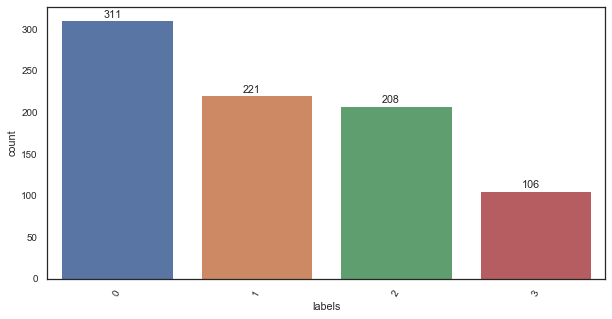

In [ ]:
#plt.subplots(figsize=(5,3))
ax = sns.countplot(df_comp['labels'])
plt.xticks(rotation=60)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+3))

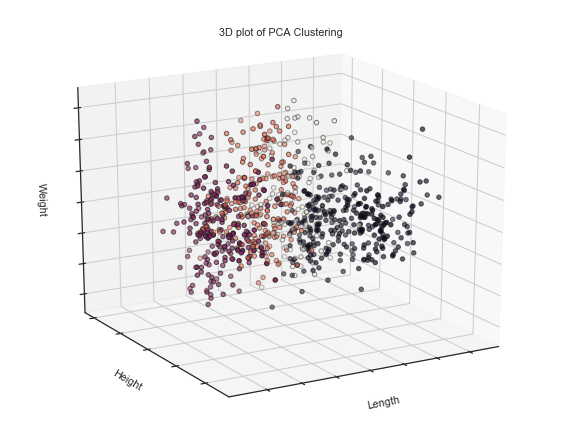

In [ ]:
## 3D plots of clusters
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean',  linkage= 'ward')
model.fit(df_comp.iloc[:,:-1])
labels = model.labels_
ax.scatter(df_comp.iloc[:, 0], df_comp.iloc[:, 1], df_comp.iloc[:, 2],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of PCA Clustering');

### Use Support Vector Model for PCA

### Train the Data with split 70:30 ratio

In [ ]:
W = df_comp.drop(['labels'],axis=1)
z = df_comp['labels']

In [ ]:
W_train,W_test,z_train,z_test = train_test_split(W,z,test_size=0.3,random_state=42)

In [ ]:
# fitting the svm using the best parameters
psvm = SVC(probability=True,random_state=42)
psvm.fit(W_train,z_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
#Predict for train set
W_pred = psvm.predict(W_train)
#Predict for test set
z_pred = psvm.predict(W_test)
tn, fp, fn, tp = metrics.confusion_matrix(z_test, z_pred,labels=[0,1]).ravel()
ptrainscore = round(metrics.accuracy_score(z_train,W_pred),3)
ptestscore = round(metrics.accuracy_score(z_test,z_pred),3)
pprecision = round(tp/(tp+fp), 3)
precall = round(tp/(tp+fn), 3)
pf1_score = round(2*(precall * pprecision) / (precall + pprecision),3)
#Store the accuracy results for each kernel in a dataframe for final comparison
p_resultsDf=pd.DataFrame({'Model':['RAW_SVM'],'TrainAccuracy':ptrainscore,'TestAccuracy':ptestscore,
                        'Precision':pprecision,'Recall':precall,'f1_score':pf1_score},index={'3'})
p_resultsDf=resultsDf[['Model','TrainAccuracy','TestAccuracy','Precision','Recall', 'f1_score']]
p_resultsDf

Model  TrainAccuracy  TestAccuracy  Precision  Recall  f1_score
1   SVM           0.65         0.654      0.746   0.969     0.843

#### Use GridSearch to find the best svm parameters

In [ ]:
# Use GridSearch to find the best svm parameters, and fit the training data to apply to test data.

gscsvm = model_selection.GridSearchCV(estimator= SVC(probability=True,random_state=42),
                     param_grid=[{'C':[2,3,4,5],
                                  'kernel':['linear', 'rbf', 'poly'],
                                  'degree':[2,3,5],
                                  'gamma':['auto']
                                 }],
                     scoring='accuracy',cv=10,n_jobs=4)
gscsvm_fit = gscsvm.fit(W_train, z_train)
z_pred = gscsvm_fit.predict(W_test)
pcabestscore = round(gscsvm.best_score_,3)
pcatrainscore = round(gscsvm.score(W_train, z_train),3)
pcatestscore = round(gscsvm.score(W_test, z_test),3)
print('Model  BestScore TrainingScore TestScore')
print()
print(f'SVM:     {pcabestscore}       {pcatrainscore}        {pcatestscore}')
print('\n******************************************\n')
## best parameter
print('Best parameter :\n',gscsvm.best_params_)
## best estimator
print('\nSVM parameters: \n', gscsvm_fit.best_estimator_)

Model  BestScore TrainingScore TestScore

SVM:     0.949       0.981        0.961

******************************************

Best parameter :
 {'C': 2, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}

SVM parameters: 
 SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)


### k-fold Cross Validation score

In [ ]:
#Cross Validation score for support vector model
psvm_scores=model_selection.cross_val_score(psvm , X_train, y_train, scoring='accuracy', cv=10)
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(psvm_scores), np.std(psvm_scores)))

Cross Validation accuracy: 0.921 +/- 0.048


- Mean of cross validation score is very good and very closs to mean value so the model is reliable.

### Predict the PCA scores using support vector model and compare with the previous scores of classification

In [ ]:
#Store the accuracy results for each kernel in a dataframe for final comparison
presultsDf=pd.DataFrame({'Model':['PCA_SVM'],'TrainAccuracy':strainscore,'TestAccuracy':ptestscore,
                        'Precision':pprecision,'Recall':precall,'f1_score':pf1_score,'CVmean':round(np.mean(psvm_scores),3),
                        'CVStd': round(np.std(psvm_scores),3),'bestscore':pcabestscore },index={'3'})
presultsDf = pd.concat([rresultsDf, sresultsDf,presultsDf])
presultsDf=presultsDf[['Model','TrainAccuracy','TestAccuracy','Precision','Recall', 'f1_score','CVmean','CVStd','bestscore']]
presultsDf

Model  TrainAccuracy  TestAccuracy  Precision  Recall  f1_score  \
1     Raw_SVM          0.650         0.654      0.746   0.969     0.843   
2  Scaled_SVM          0.953         0.945      0.983   1.000     0.991   
3     PCA_SVM          0.953         0.949      1.000   1.000     1.000   

   CVmean  CVStd  bestscore  
1   0.625  0.062      0.943  
2   0.914  0.040      0.927  
3   0.921  0.048      0.949

In [ ]:
print(f'   Confusion Matrix Raw:\n{metrics.confusion_matrix(y_test, yp_pred)}')
print()
print(f'Confusion Matrix scaled:\n{metrics.confusion_matrix(y_test, y_pred)}')
print()
print(f'   Confusion Matrix PCA:\n{metrics.confusion_matrix(z_test, z_pred)}')

   Confusion Matrix Raw:
[[31 32 15]
 [ 3 94 21]
 [15  2 41]]

Confusion Matrix scaled:
[[ 71   4   3]
 [  0 116   2]
 [  2   4  52]]

   Confusion Matrix PCA:
[[91  0  2  0]
 [ 0 72  3  0]
 [ 0  2 53  1]
 [ 2  0  0 28]]


__The Raw data accuracy is comparatively less. The standardized and dropped variable and PCA have higher accuracy__

### Both the Supervised (scaled and dropped variables)and Unsupervised are performance Excellent however Unsupervised is performing better comparing all the metrics.

**Cross Validation score is good which means the model is reliable**

**Precision:**
- Precision = TP/TP+FP
- Precision is the ratio of correctly predicted positive values to the total predicted positive values. This metric highlights the correct positive predictions out of all the positive predictions. High precision indicates low false positive rate.

**Recall (Sensitivity):**
- Recall = TP/TP+FN
- The recall is the ratio of correctly predicted positive values to the actual positive values. Recall highlights the sensitivity of the algorithm i.e. out of all the actual positives how many were caught by the program.

**F1 Score:**
- F1 Score = 2*(Recall * Precision) / (Recall + Precision)
- It is the weighted average of Precision and Recall.